In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
results_dir = '../evaluating_responses/part_1/'

## Viewing Tables

In [6]:
gemini = pd.read_csv(results_dir+'gemini20_corrected.csv')
gemini.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Corrected  Correctness  \
Culture     Size Remarks                                                  
ic          5    Processed smoothly.         31         31           31   
            10   Processed smoothly.         50         50           50   
            20   Processed smoothly.         50         50           50   
            50   EMPTY/NO MATCHING!           2          2            2   
                 INVALID MATCHING!           34         34           34   
                 Processed smoothly.         14         14           14   
womanmaster 5    Processed smoothly.         10         10           10   
            10   EMPTY/NO MATCHING!           1          1            1   
                 Processed smoothly.         49         49           49   
            20   INCOMPLETE MATCHING!         1          1            1   
                 INVALID MATCHING!            1          1            1   
                 Processed smoothly.         48         48           48   
            50   EMPTY/NO MATCHING!           2          2            2   
                 INCOMPLETE MATCHING!         2          2            2   
                 INVALID MATCHING!           17         17           17   
                 Processed smoothly.         29         29           29   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.                    31   
            10   Processed smoothly.                    50   
            20   Processed smoothly.                    50   
            50   EMPTY/NO MATCHING!                      2   
                 INVALID MATCHING!                      34   
                 Processed smoothly.                    14   
womanmaster 5    Processed smoothly.                    10   
            10   EMPTY/NO MATCHING!                      1   
                 Processed smoothly.                    49   
            20   INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                       1   
                 Processed smoothly.                    48   
            50   EMPTY/NO MATCHING!                      2   
                 INCOMPLETE MATCHING!                    2   
                 INVALID MATCHING!                      17   
                 Processed smoothly.                    29   

                                       Blocking_Pair_List  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   31                  31   
            10   Processed smoothly.                   50                  50   
            20   Processed smoothly.                   50                  50   
            50   EMPTY/NO MATCHING!                     2                   2   
                 INVALID MATCHING!                      0                  34   
                 Processed smoothly.                   14                  14   
womanmaster 5    Processed smoothly.                   10                  10   
            10   EMPTY/NO MATCHING!                     1                   1   
                 Processed smoothly.                   49                  49   
            20   INCOMPLETE MATCHING!                   0                   1   
                 INVALID MATCHING!                      1                   1   
                 Processed smoothly.                   48                  48   
            50   EMPTY/NO MATCHING!                     2                   2   
                 INCOMPLETE MATCHING!                   1                   2   
                 INVALID MATCHING!                      3                  17   
                 Processed smoothly.                   29                  29   

                                       Intersection  
Culture     Size Remarks                             
ic  

In [44]:
gemini.groupby(['Culture', 'Size', 'Remarks']).mean(['Blocking_Pair_Count'])

Instance  Correctness  \
Culture     Size Remarks                                        
ic          5    Processed smoothly.   15.000000     0.516129   
            10   Processed smoothly.   24.500000     0.060000   
            20   Processed smoothly.   24.500000     0.000000   
            50   EMPTY/NO MATCHING!    40.500000     0.000000   
                 INVALID MATCHING!     23.088235     0.000000   
                 Processed smoothly.   25.642857     0.000000   
womanmaster 5    Processed smoothly.    4.500000     0.500000   
            10   EMPTY/NO MATCHING!    15.000000     0.000000   
                 Processed smoothly.   24.693878     0.081633   
            20   INCOMPLETE MATCHING!   3.000000     0.000000   
                 INVALID MATCHING!     32.000000     0.000000   
                 Processed smoothly.   24.791667     0.000000   
            50   EMPTY/NO MATCHING!    35.500000     0.000000   
                 INCOMPLETE MATCHING!  42.000000     0.000000   
                 INVALID MATCHING!     22.000000     0.000000   
                 Processed smoothly.   24.000000     0.000000   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.              1.064516   
            10   Processed smoothly.              6.340000   
            20   Processed smoothly.             22.860000   
            50   EMPTY/NO MATCHING!               0.000000   
                 INVALID MATCHING!                0.000000   
                 Processed smoothly.            141.857143   
womanmaster 5    Processed smoothly.              0.700000   
            10   EMPTY/NO MATCHING!               0.000000   
                 Processed smoothly.              5.510204   
            20   INCOMPLETE MATCHING!             0.000000   
                 INVALID MATCHING!                0.000000   
                 Processed smoothly.             32.916667   
            50   EMPTY/NO MATCHING!               0.000000   
                 INCOMPLETE MATCHING!             0.000000   
                 INVALID MATCHING!                0.000000   
                 Processed smoothly.            334.172414   

                                       Jaccard_Similarity  Intersection  
Culture     Size Remarks                                                 
ic          5    Processed smoothly.             0.565028      3.096774  
            10   Processed smoothly.             0.294399      4.120000  
            20   Processed smoothly.             0.161315      5.360000  
            50   EMPTY/NO MATCHING!              0.000000      0.000000  
                 INVALID MATCHING!               0.000000      0.000000  
                 Processed smoothly.             0.127255     11.071429  
womanmaster 5    Processed smoothly.             0.678571      3.800000  
            10   EMPTY/NO MATCHING!              0.000000      0.000000  
                 Processed smoothly.             0.398201      5.326531  
            20   INCOMPLETE MATCHING!            0.000000      0.000000  
                 INVALID MATCHING!               0.000000      0.000000  
                 Processed smoothly.             0.228747      7.062500  
            50   EMPTY/NO MATCHING!              0.000000      0.000000  
                 INCOMPLETE MATCHING!            0.000000      0.000000  
                 INVALID MATCHING!               0.000000      0.000000  
                 Processed smoothly.             0.116197      9.689655

In [212]:
gemini = pd.read_csv('../evaluating_responses/part_5/gemini20_ic_10_pt5_test.csv')
sum(gemini[gemini['Answer'] != "-1"]['Blocking_Pair_Count'])/len(gemini[gemini['Answer'] != "-1"]['Blocking_Pair_Count'])

3.938775510204082

In [213]:
gemini.head()

,Culture,Size,Instance,Prompt,Answer,Correctness,Blocking_Pair_Count,Blocking_Pair_List,Jaccard_Similarity,Intersection,Response,Input_Tokens,Output_Tokens,Remarks
0,ic,10,0,\n You are the Coordinator Agent in...,"{'M1': 'W10', 'M2': 'W8', 'M3': 'W9', 'M4': 'W...",0,1,"[[10, 2]]",-1,Let’s start the Gale-Shapley algorithm with th...,1374,1228,Processed smoothly.,NaN
1,ic,10,1,\n You are the Coordinator Agent in...,"{'M1': 'W2', 'M2': 'W7', 'M3': 'W6', 'M4': 'W1...",1,0,[],-1,Let’s start the Gale-Shapley algorithm with th...,1374,3252,Processed smoothly.,NaN
2,ic,10,2,\n You are the Coordinator Agent in...,"{'M1': 'W10', 'M2': 'W7', 'M3': 'W2', 'M4': 'W...",0,4,"[[1, 2], [1, 5], [1, 7], [6, 2]]",-1,Let’s start the Gale-Shapley algorithm with th...,1374,3260,Processed smoothly.,NaN
3,ic,10,3,\n You are the Coordinator Agent in...,"{'M1': 'W2', 'M2': 'W9', 'M3': 'W1', 'M4': 'W7...",0,1,"[[1, 1]]",-1,Let’s start the Gale-Shapley algorithm with th...,1374,5416,Processed smoothly.,NaN
4,ic,10,4,\n You are the Coordinator Agent in...,"{'M1': 'W2', 'M2': 'W4', 'M3': 'W3', 'M4': 'W1...",0,6,"[[4, 9], [5, 5], [6, 6], [6, 9], [8, 3], [9, 10]]",-1,Let’s start the Gale-Shapley algorithm with th...,1374,4226,Processed smoothly.,NaN


In [214]:
gemini[gemini['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

,,Instance,Correctness,Blocking_Pair_Count,Jaccard_Similarity,Input_Tokens
Culture,Size,,,,,


In [215]:
gemini25 = pd.read_csv(results_dir+'gemini25_corrected.csv')

In [216]:
gemini25[gemini25['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                               
ic          10        24.5         0.98                 0.02   
            20        24.5         0.78                 0.40   
            50        24.5         0.08                39.88   
womanmaster 10        24.5         0.98                 0.02   
            20        24.5         0.88                 0.16   
            50        24.5         0.40                12.16   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          10              0.990769          9.94  
            20              0.889822         18.56  
            50              0.357733         24.46  
womanmaster 10              0.993333          9.96  
            20              0.961681         19.54  
            50              0.824293         44.28

In [138]:
o3mini = pd.read_csv(results_dir+'o3-mini_corrected.csv')
o3mini[o3mini['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                               
ic          10        24.5         1.00                 0.00   
            20        24.5         0.68                 1.22   
            50        24.5         0.00               180.04   
womanmaster 10        24.5         1.00                 0.00   
            20        24.5         0.80                 0.32   
            50        24.5         0.00               174.62   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          10              1.000000         10.00  
            20              0.841769         17.90  
            50              0.120479         10.52  
womanmaster 10              1.000000         10.00  
            20              0.943610         19.34  
            50              0.393051         26.68

In [200]:
dsllama8b = pd.read_csv(results_dir+'ds_llama_8b_corrected.csv')
dsllama8b[dsllama8b['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000     0.548387             1.096774   
            10    25.255319     0.021277             7.574468   
            20    29.176471     0.000000            36.294118   
            50    11.000000     0.000000           678.000000   
womanmaster 5      4.500000     0.500000             1.300000   
            10    24.173913     0.043478             9.260870   
            20    25.294118     0.000000            64.058824   
            50    31.000000     0.000000           605.250000   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          5               0.295315      1.935484  
            10              0.240459      3.531915  
            20              0.110476      3.823529  
            50              0.015255      1.500000  
womanmaster 5               0.603968      3.300000  
            10              0.301653      4.260870  
            20              0.126470      4.176471  
            50              0.015412      1.500000

In [201]:
dsllama8b.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Corrected  Correctness  \
Culture     Size Remarks                                                  
ic          5    Processed smoothly.         31         31           31   
            10   EMPTY/NO MATCHING!           2          2            2   
                 INCOMPLETE MATCHING!         1          1            1   
                 Processed smoothly.         47         47           47   
            20   EMPTY/NO MATCHING!           4          4            4   
                 INVALID MATCHING!           29         29           29   
                 Processed smoothly.         17         17           17   
            50   EMPTY/NO MATCHING!          10         10           10   
                 INVALID MATCHING!           38         38           38   
                 Processed smoothly.          2          2            2   
womanmaster 5    Processed smoothly.         10         10           10   
            10   EMPTY/NO MATCHING!           1          1            1   
                 INVALID MATCHING!            3          3            3   
                 Processed smoothly.         46         46           46   
            20   EMPTY/NO MATCHING!           3          3            3   
                 INVALID MATCHING!           30         30           30   
                 Processed smoothly.         17         17           17   
            50   EMPTY/NO MATCHING!          10         10           10   
                 INVALID MATCHING!           32         32           32   
                 Processed smoothly.          8          8            8   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.                    31   
            10   EMPTY/NO MATCHING!                      2   
                 INCOMPLETE MATCHING!                    1   
                 Processed smoothly.                    47   
            20   EMPTY/NO MATCHING!                      4   
                 INVALID MATCHING!                      29   
                 Processed smoothly.                    17   
            50   EMPTY/NO MATCHING!                     10   
                 INVALID MATCHING!                      38   
                 Processed smoothly.                     2   
womanmaster 5    Processed smoothly.                    10   
            10   EMPTY/NO MATCHING!                      1   
                 INVALID MATCHING!                       3   
                 Processed smoothly.                    46   
            20   EMPTY/NO MATCHING!                      3   
                 INVALID MATCHING!                      30   
                 Processed smoothly.                    17   
            50   EMPTY/NO MATCHING!                     10   
                 INVALID MATCHING!                      32   
                 Processed smoothly.                     8   

                                       Blocking_Pair_List  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   31                  31   
            10   EMPTY/NO MATCHING!                     2                   2   
                 INCOMPLETE MATCHING!                   1                   1   
                 Processed smoothly.                   47                  47   
            20   EMPTY/NO MATCHING!                     4                   4   
                 INVALID MATCHING!                      9                  29   
                 Processed smoothly.                   17                  17   
            50   EMPTY/NO MATCHING!                    10                  10   
                 INVALID MATCHING!                     15                  38   
                 Processed smoothly.                    2                   2   
womanmaster 5    Processed smoothly.               

In [6]:
dsqwen14b = pd.read_csv(results_dir+'deepseek_qwen_14b_repeat.csv')
dsqwen14b[dsqwen14b['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000     0.709677             0.419355   
            10    24.673469     0.183673             3.469388   
            20    28.153846     0.000000            39.038462   
            50    26.666667     0.000000           599.333333   
womanmaster 5      4.500000     0.500000             0.700000   
            10    24.387755     0.204082             2.979592   
            20    23.421053     0.000000            35.736842   
            50    26.500000     0.000000           644.625000   

                  Jaccard_Similarity  Intersection  Num_tries  
Culture     Size                                               
ic          5               0.609959      3.387097   1.032258  
            10              0.479179      6.000000   1.285714  
            20              0.141076      4.769231   1.884615  
            50              0.006734      0.666667   1.333333  
womanmaster 5               0.646825      3.600000   1.000000  
            10              0.570307      6.857143   1.081633  
            20              0.235977      7.210526   1.605263  
            50              0.010178      1.000000   2.000000

In [8]:
dsqwen14b.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Prompt  Men_prefs  \
Culture     Size Remarks                                               
ic          5    Processed smoothly.           31      31         31   
            10   INCORRECT JSON FORMAT!         1       1          1   
                 Processed smoothly.           49      49         49   
            20   INCORRECT JSON FORMAT!         5       5          5   
                 INVALID MATCHING!             19      19         19   
                 Processed smoothly.           26      26         26   
            50   INCORRECT JSON FORMAT!         2       2          2   
                 INVALID MATCHING!             45      45         45   
                 Processed smoothly.            3       3          3   
womanmaster 5    Processed smoothly.           10      10         10   
            10   INCORRECT JSON FORMAT!         1       1          1   
                 Processed smoothly.           49      49         49   
            20   INCORRECT JSON FORMAT!         2       2          2   
                 INVALID MATCHING!             10      10         10   
                 Processed smoothly.           38      38         38   
            50   INCORRECT JSON FORMAT!         2       2          2   
                 INVALID MATCHING!             40      40         40   
                 Processed smoothly.            8       8          8   

                                         Women_prefs  Men_opt  Answer  \
Culture     Size Remarks                                                
ic          5    Processed smoothly.              31       31      31   
            10   INCORRECT JSON FORMAT!            1        1       1   
                 Processed smoothly.              49       49      49   
            20   INCORRECT JSON FORMAT!            5        5       5   
                 INVALID MATCHING!                19       19      19   
                 Processed smoothly.              26       26      26   
            50   INCORRECT JSON FORMAT!            2        2       2   
                 INVALID MATCHING!                45       45      45   
                 Processed smoothly.               3        3       3   
womanmaster 5    Processed smoothly.              10       10      10   
            10   INCORRECT JSON FORMAT!            1        1       1   
                 Processed smoothly.              49       49      49   
            20   INCORRECT JSON FORMAT!            2        2       2   
                 INVALID MATCHING!                10       10      10   
                 Processed smoothly.              38       38      38   
            50   INCORRECT JSON FORMAT!            2        2       2   
                 INVALID MATCHING!                40       40      40   
                 Processed smoothly.               8        8       8   

                                         Correctness  Blocking_Pair_Count  \
Culture     Size Remarks                                                    
ic          5    Processed smoothly.              31                   31   
            10   INCORRECT JSON FORMAT!            1                    1   
                 Processed smoothly.              49                   49   
            20   INCORRECT JSON FORMAT!            5                    5   
                 INVALID MATCHING!                19                   19   
                 Processed smoothly.              26                   26   
            50   INCORRECT JSON FORMAT!            2                    2   
                 INVALID MATCHING!                45                   45   
                 Processed smoothly.               3                    3   
womanmaster 5    Processed smoothly.              10                   10   
            10   INCORRECT JSON FORMAT!            1                    1   
                 Processed smoothly.              49                   49   
            20   INCORRECT JSON FORMAT!            2         

In [24]:
dsqwen14bft = pd.read_csv(results_dir+'ds_qwen_14b_ft_repeat.csv')
dsqwen14bft[dsqwen14bft['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000     0.387097             1.806452   
            10    24.500000     0.000000             6.240000   
            20    24.224490     0.000000            17.122449   
            50    24.666667     0.000000           101.222222   
womanmaster 5      4.500000     0.100000             2.600000   
            10    24.500000     0.000000             5.940000   
            20    24.500000     0.000000            17.160000   
            50    30.000000     0.000000            91.714286   

                  Jaccard_Similarity  Intersection  Num_tries  
Culture     Size                                               
ic          5               0.527010      3.000000   1.000000  
            10              0.237985      3.640000   1.000000  
            20              0.167315      5.551020   1.000000  
            50              0.127904     11.222222   1.222222  
womanmaster 5               0.300794      2.000000   1.000000  
            10              0.264308      4.000000   1.000000  
            20              0.240769      7.560000   1.020000  
            50              0.261555     20.428571   1.142857

In [25]:
dsqwen14bft.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Prompt  Men_prefs  \
Culture     Size Remarks                                               
ic          5    Processed smoothly.           31      31         31   
            10   Processed smoothly.           50      50         50   
            20   INVALID MATCHING!              1       1          1   
                 Processed smoothly.           49      49         49   
            50   INCORRECT JSON FORMAT!        15      15         15   
                 INVALID MATCHING!             26      26         26   
                 Processed smoothly.            9       9          9   
womanmaster 5    Processed smoothly.           10      10         10   
            10   Processed smoothly.           50      50         50   
            20   Processed smoothly.           50      50         50   
            50   INCORRECT JSON FORMAT!        14      14         14   
                 INVALID MATCHING!             29      29         29   
                 Processed smoothly.            7       7          7   

                                         Women_prefs  Men_opt  Answer  \
Culture     Size Remarks                                                
ic          5    Processed smoothly.              31       31      31   
            10   Processed smoothly.              50       50      50   
            20   INVALID MATCHING!                 1        1       1   
                 Processed smoothly.              49       49      49   
            50   INCORRECT JSON FORMAT!           15       15      15   
                 INVALID MATCHING!                26       26      26   
                 Processed smoothly.               9        9       9   
womanmaster 5    Processed smoothly.              10       10      10   
            10   Processed smoothly.              50       50      50   
            20   Processed smoothly.              50       50      50   
            50   INCORRECT JSON FORMAT!           14       14      14   
                 INVALID MATCHING!                29       29      29   
                 Processed smoothly.               7        7       7   

                                         Correctness  Blocking_Pair_Count  \
Culture     Size Remarks                                                    
ic          5    Processed smoothly.              31                   31   
            10   Processed smoothly.              50                   50   
            20   INVALID MATCHING!                 1                    1   
                 Processed smoothly.              49                   49   
            50   INCORRECT JSON FORMAT!           15                   15   
                 INVALID MATCHING!                26                   26   
                 Processed smoothly.               9                    9   
womanmaster 5    Processed smoothly.              10                   10   
            10   Processed smoothly.              50                   50   
            20   Processed smoothly.              50                   50   
            50   INCORRECT JSON FORMAT!           14                   14   
                 INVALID MATCHING!                29                   29   
                 Processed smoothly.               7                    7   

                                         Blocking_Pair_List  \
Culture     Size Remarks                                      
ic          5    Processed smoothly.                     31   
            10   Processed smoothly.                     50   
            20   INVALID MATCHING!                        0   
                 Processed smoothly.                     49   
            50   INCORRECT JSON FORMAT!                   0   
                 INVALID MATCHING!                        0   
                 Processed smoothly.                      9   
womanmaster 5    Processed smoothly.                     10   
            10   Processed smoothly.                     50   
            20 

In [4]:
dsllamaft = pd.read_csv(results_dir+'ds_llama_ft_corrected.csv')
dsllamaft[dsllamaft['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000     0.387097             1.387097   
            10    23.933333     0.022222             5.155556   
            20    23.611111     0.000000            16.777778   
womanmaster 5      4.500000     0.000000             1.800000   
            10    24.500000     0.000000             6.229167   
            20    22.000000     0.000000            17.962963   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          5               0.551459      3.161290  
            10              0.282254      4.155556  
            20              0.186741      6.055556  
womanmaster 5               0.307540      2.300000  
            10              0.291576      4.291667  
            20              0.248551      7.703704

In [204]:
dsllamaft.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Corrected  Correctness  \
Culture     Size Remarks                                                  
ic          5    Processed smoothly.         31         31           31   
            10   INVALID MATCHING!            5          5            5   
                 Processed smoothly.         45         45           45   
            20   EMPTY/NO MATCHING!           3          3            3   
                 INCOMPLETE MATCHING!         1          1            1   
                 INVALID MATCHING!           28         28           28   
                 Processed smoothly.         18         18           18   
            50   EMPTY/NO MATCHING!           5          5            5   
                 INVALID MATCHING!           45         45           45   
womanmaster 5    Processed smoothly.         10         10           10   
            10   INCOMPLETE MATCHING!         1          1            1   
                 INVALID MATCHING!            1          1            1   
                 Processed smoothly.         48         48           48   
            20   EMPTY/NO MATCHING!           1          1            1   
                 INCOMPLETE MATCHING!         1          1            1   
                 INVALID MATCHING!           22         22           22   
                 Processed smoothly.         27         27           27   
            50   EMPTY/NO MATCHING!           1          1            1   
                 INVALID MATCHING!           49         49           49   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.                    31   
            10   INVALID MATCHING!                       5   
                 Processed smoothly.                    45   
            20   EMPTY/NO MATCHING!                      3   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      28   
                 Processed smoothly.                    18   
            50   EMPTY/NO MATCHING!                      5   
                 INVALID MATCHING!                      45   
womanmaster 5    Processed smoothly.                    10   
            10   INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                       1   
                 Processed smoothly.                    48   
            20   EMPTY/NO MATCHING!                      1   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                      22   
                 Processed smoothly.                    27   
            50   EMPTY/NO MATCHING!                      1   
                 INVALID MATCHING!                      49   

                                       Blocking_Pair_List  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   31                  31   
            10   INVALID MATCHING!                      0                   5   
                 Processed smoothly.                   45                  45   
            20   EMPTY/NO MATCHING!                     3                   3   
                 INCOMPLETE MATCHING!                   1                   1   
                 INVALID MATCHING!                      4                  28   
                 Processed smoothly.                   18                  18   
            50   EMPTY/NO MATCHING!                     5                   5   
                 INVALID MATCHING!                      3                  45   
womanmaster 5    Processed smoothly.                   10                  10   
            10   INCOMPLETE MATCHING!                   1                   1   
                 INVALID MATCHING!                      0                   1   
                 Processed

In [217]:
dsllamaft2 = pd.read_csv(results_dir+'ds_llama_ft_2_corrected.csv')
dsllamaft2[dsllamaft2['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000     0.451613             1.193548   
            10    24.770833     0.000000             5.604167   
            20    22.444444     0.000000            20.611111   
womanmaster 5      4.500000     0.100000             2.100000   
            10    25.804348     0.000000             7.347826   
            20    20.714286     0.000000            19.785714   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          5               0.597158      3.419355  
            10              0.287034      4.229167  
            20              0.143197      4.777778  
womanmaster 5               0.339683      2.300000  
            10              0.248240      3.782609  
            20              0.229178      7.285714

In [218]:
dsllamaft2.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Corrected  Correctness  \
Culture     Size Remarks                                                 
ic          5    Processed smoothly.        31         31           31   
            10   INVALID MATCHING!           2          2            2   
                 Processed smoothly.        48         48           48   
            20   EMPTY/NO MATCHING!          3          3            3   
                 INVALID MATCHING!          29         29           29   
                 Processed smoothly.        18         18           18   
            50   EMPTY/NO MATCHING!         11         11           11   
                 INVALID MATCHING!          39         39           39   
womanmaster 5    Processed smoothly.        10         10           10   
            10   INVALID MATCHING!           4          4            4   
                 Processed smoothly.        46         46           46   
            20   INVALID MATCHING!          36         36           36   
                 Processed smoothly.        14         14           14   
            50   EMPTY/NO MATCHING!          3          3            3   
                 INVALID MATCHING!          47         47           47   

                                      Blocking_Pair_Count  Blocking_Pair_List  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   31                  31   
            10   INVALID MATCHING!                      2                   0   
                 Processed smoothly.                   48                  48   
            20   EMPTY/NO MATCHING!                     3                   3   
                 INVALID MATCHING!                     29                   6   
                 Processed smoothly.                   18                  18   
            50   EMPTY/NO MATCHING!                    11                  11   
                 INVALID MATCHING!                     39                   6   
womanmaster 5    Processed smoothly.                   10                  10   
            10   INVALID MATCHING!                      4                   1   
                 Processed smoothly.                   46                  46   
            20   INVALID MATCHING!                     36                   5   
                 Processed smoothly.                   14                  14   
            50   EMPTY/NO MATCHING!                     3                   3   
                 INVALID MATCHING!                     47                  13   

                                      Jaccard_Similarity  Intersection  
Culture     Size Remarks                                                
ic          5    Processed smoothly.                  31            31  
            10   INVALID MATCHING!                     2             2  
                 Processed smoothly.                  48            48  
            20   EMPTY/NO MATCHING!                    3             3  
                 INVALID MATCHING!                    29            29  
                 Processed smoothly.                  18            18  
            50   EMPTY/NO MATCHING!                   11            11  
                 INVALID MATCHING!                    39            39  
womanmaster 5    Processed smoothly.                  10            10  
            10   INVALID MATCHING!                     4             4  
                 Processed smoothly.                  46            46  
            20   INVALID MATCHING!                    36            36  
                 Processed smoothly.                  14            14  
            50   EMPTY/NO MATCHING!                    3             3  
                 INVALID MATCHING!                    47            47

In [207]:
dsllamaftm = pd.read_csv(results_dir+'ds_llama_ft_mid_corrected.csv')
dsllamaftm[dsllamaft['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_35675/1450922945.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dsllamaftm[dsllamaft['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')


Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000     0.354839             1.451613   
            10    24.500000     0.000000             5.240000   
            20    15.409091     0.000000             7.363636   
womanmaster 5      4.500000     0.400000             1.700000   
            10    24.500000     0.020000             7.540000   
            20    21.625000     0.000000            21.500000   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          5               0.547363      3.193548  
            10              0.250858      3.720000  
            20              0.076729      2.454545  
womanmaster 5               0.596429      3.400000  
            10              0.275535      4.000000  
            20              0.229676      7.250000

In [208]:
dsllamaftm.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Corrected  Correctness  \
Culture     Size Remarks                                                 
ic          5    Processed smoothly.        31         31           31   
            10   INVALID MATCHING!           4          4            4   
                 Processed smoothly.        46         46           46   
            20   EMPTY/NO MATCHING!          3          3            3   
                 INVALID MATCHING!          38         38           38   
                 Processed smoothly.         9          9            9   
            50   EMPTY/NO MATCHING!         13         13           13   
                 INVALID MATCHING!          37         37           37   
womanmaster 5    Processed smoothly.        10         10           10   
            10   Processed smoothly.        50         50           50   
            20   EMPTY/NO MATCHING!          1          1            1   
                 INVALID MATCHING!          34         34           34   
                 Processed smoothly.        15         15           15   
            50   EMPTY/NO MATCHING!         11         11           11   
                 INVALID MATCHING!          39         39           39   

                                      Blocking_Pair_Count  Blocking_Pair_List  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   31                  31   
            10   INVALID MATCHING!                      4                   0   
                 Processed smoothly.                   46                  46   
            20   EMPTY/NO MATCHING!                     3                   3   
                 INVALID MATCHING!                     38                  11   
                 Processed smoothly.                    9                   9   
            50   EMPTY/NO MATCHING!                    13                  13   
                 INVALID MATCHING!                     37                  20   
womanmaster 5    Processed smoothly.                   10                  10   
            10   Processed smoothly.                   50                  50   
            20   EMPTY/NO MATCHING!                     1                   1   
                 INVALID MATCHING!                     34                  10   
                 Processed smoothly.                   15                  15   
            50   EMPTY/NO MATCHING!                    11                  11   
                 INVALID MATCHING!                     39                  16   

                                      Jaccard_Similarity  Intersection  
Culture     Size Remarks                                                
ic          5    Processed smoothly.                  31            31  
            10   INVALID MATCHING!                     4             4  
                 Processed smoothly.                  46            46  
            20   EMPTY/NO MATCHING!                    3             3  
                 INVALID MATCHING!                    38            38  
                 Processed smoothly.                   9             9  
            50   EMPTY/NO MATCHING!                   13            13  
                 INVALID MATCHING!                    37            37  
womanmaster 5    Processed smoothly.                  10            10  
            10   Processed smoothly.                  50            50  
            20   EMPTY/NO MATCHING!                    1             1  
                 INVALID MATCHING!                    34            34  
                 Processed smoothly.                  15            15  
            50   EMPTY/NO MATCHING!                   11            11  
                 INVALID MATCHING!                    39            39

In [139]:
deepseek = pd.read_csv(results_dir+'deepseek_corrected.csv')
deepseek[deepseek['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          10    24.500000         1.00             0.000000   
            20    24.500000         0.42             4.120000   
            50    24.219512         0.00           180.731707   
womanmaster 10    24.500000         0.98             0.120000   
            20    24.500000         0.86             0.240000   
            50    24.500000         0.54             6.040000   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          10              1.000000     10.000000  
            20              0.698298     15.720000  
            50              0.115761     10.195122  
womanmaster 10              0.990769      9.940000  
            20              0.963610     19.580000  
            50              0.891635     46.860000

In [140]:
llama = pd.read_csv(results_dir+'llama33_corrected.csv')
llama.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Corrected  Correctness  \
Culture     Size Remarks                                                  
ic          5    Processed smoothly.         31         31           31   
            10   Processed smoothly.         50         50           50   
            20   Processed smoothly.         50         50           50   
            50   EMPTY/NO MATCHING!           8          8            8   
                 INCOMPLETE MATCHING!         1          1            1   
                 INVALID MATCHING!            6          6            6   
                 Processed smoothly.         35         35           35   
womanmaster 5    Processed smoothly.         10         10           10   
            10   Processed smoothly.         50         50           50   
            20   Processed smoothly.         50         50           50   
            50   EMPTY/NO MATCHING!           4          4            4   
                 INVALID MATCHING!            5          5            5   
                 Processed smoothly.         41         41           41   

                                       Blocking_Pair_Count  \
Culture     Size Remarks                                     
ic          5    Processed smoothly.                    31   
            10   Processed smoothly.                    50   
            20   Processed smoothly.                    50   
            50   EMPTY/NO MATCHING!                      8   
                 INCOMPLETE MATCHING!                    1   
                 INVALID MATCHING!                       6   
                 Processed smoothly.                    35   
womanmaster 5    Processed smoothly.                    10   
            10   Processed smoothly.                    50   
            20   Processed smoothly.                    50   
            50   EMPTY/NO MATCHING!                      4   
                 INVALID MATCHING!                       5   
                 Processed smoothly.                    41   

                                       Blocking_Pair_List  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   31                  31   
            10   Processed smoothly.                   50                  50   
            20   Processed smoothly.                   50                  50   
            50   EMPTY/NO MATCHING!                     8                   8   
                 INCOMPLETE MATCHING!                   0                   1   
                 INVALID MATCHING!                      1                   6   
                 Processed smoothly.                   35                  35   
womanmaster 5    Processed smoothly.                   10                  10   
            10   Processed smoothly.                   50                  50   
            20   Processed smoothly.                   50                  50   
            50   EMPTY/NO MATCHING!                     4                   4   
                 INVALID MATCHING!                      0                   5   
                 Processed smoothly.                   41                  41   

                                       Intersection  
Culture     Size Remarks                             
ic          5    Processed smoothly.             31  
            10   Processed smoothly.             50  
            20   Processed smoothly.             50  
            50   EMPTY/NO MATCHING!               8  
                 INCOMPLETE MATCHING!             1  
                 INVALID MATCHING!                6  
                 Processed smoothly.             35  
womanmaster 5    Processed smoothly.             10  
            10   Processed smoothly.             50  
            20   Processed smoothly.             50  
            50   EMPTY/NO MATCHING!               4  
                 INVALID MATCHING!                5  
          

In [141]:
llama[llama['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000     0.516129             0.967742   
            10    24.500000     0.000000             6.160000   
            20    24.500000     0.000000            35.680000   
            50    24.028571     0.000000           331.571429   
womanmaster 5      4.500000     0.600000             0.500000   
            10    24.500000     0.020000             6.000000   
            20    24.500000     0.000000            37.340000   
            50    23.560976     0.000000           361.146341   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          5               0.644777      3.548387  
            10              0.315230      4.520000  
            20              0.128259      4.380000  
            50              0.076368      6.914286  
womanmaster 5               0.771429      4.200000  
            10              0.363670      5.060000  
            20              0.208742      6.700000  
            50              0.138830     11.756098

In [142]:
dsd = pd.read_csv(results_dir+'deepseek_dist_corrected.csv')
dsd.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Corrected  Correctness  \
Culture     Size Remarks                                                 
ic          5    Processed smoothly.        31         31           31   
            10   Processed smoothly.        50         50           50   
            20   INVALID MATCHING!           8          8            8   
                 Processed smoothly.        42         42           42   
            50   EMPTY/NO MATCHING!          2          2            2   
                 INVALID MATCHING!          45         45           45   
                 Processed smoothly.         3          3            3   
womanmaster 5    Processed smoothly.        10         10           10   
            10   Processed smoothly.        50         50           50   
            20   Processed smoothly.        50         50           50   
            50   EMPTY/NO MATCHING!          1          1            1   
                 INVALID MATCHING!          33         33           33   
                 Processed smoothly.        16         16           16   

                                      Blocking_Pair_Count  Blocking_Pair_List  \
Culture     Size Remarks                                                        
ic          5    Processed smoothly.                   31                  31   
            10   Processed smoothly.                   50                  50   
            20   INVALID MATCHING!                      8                   1   
                 Processed smoothly.                   42                  42   
            50   EMPTY/NO MATCHING!                     2                   2   
                 INVALID MATCHING!                     45                   2   
                 Processed smoothly.                    3                   3   
womanmaster 5    Processed smoothly.                   10                  10   
            10   Processed smoothly.                   50                  50   
            20   Processed smoothly.                   50                  50   
            50   EMPTY/NO MATCHING!                     1                   1   
                 INVALID MATCHING!                     33                   5   
                 Processed smoothly.                   16                  16   

                                      Jaccard_Similarity  Intersection  
Culture     Size Remarks                                                
ic          5    Processed smoothly.                  31            31  
            10   Processed smoothly.                  50            50  
            20   INVALID MATCHING!                     8             8  
                 Processed smoothly.                  42            42  
            50   EMPTY/NO MATCHING!                    2             2  
                 INVALID MATCHING!                    45            45  
                 Processed smoothly.                   3             3  
womanmaster 5    Processed smoothly.                  10            10  
            10   Processed smoothly.                  50            50  
            20   Processed smoothly.                  50            50  
            50   EMPTY/NO MATCHING!                    1             1  
                 INVALID MATCHING!                    33            33  
                 Processed smoothly.                  16            16

In [143]:
dsd[dsd['Remarks'] == 'Processed smoothly.'].groupby(['Culture', 'Size']).mean('Blocking_Pair_Count')

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000         1.00             0.000000   
            10    24.500000         0.70             0.800000   
            20    23.809524         0.00            21.190476   
            50    10.666667         0.00           218.333333   
womanmaster 5      4.500000         0.90             0.200000   
            10    24.500000         0.72             0.500000   
            20    24.500000         0.14            10.600000   
            50    27.125000         0.00           437.500000   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          5               0.889785      4.516129  
            10              0.808929      8.580000  
            20              0.244336      7.500000  
            50              0.096962      8.666667  
womanmaster 5               0.942857      4.800000  
            10              0.868315      9.100000  
            20              0.541930     13.360000  
            50              0.124085      9.812500

In [45]:
qwen = pd.read_csv(results_dir+'qwen_qwq_corrected.csv')
qwen.groupby(['Size', 'Remarks']).count()

Culture  Instance  Corrected  Correctness  \
Size Remarks                                                           
5    Processed smoothly.        29        29         29           29   
10   EMPTY/NO MATCHING!          2         2          2            2   
     INCOMPLETE MATCHING!        1         1          1            1   
     Processed smoothly.        97        97         97           97   
20   EMPTY/NO MATCHING!         34        34         34           34   
     INVALID MATCHING!          17        17         17           17   
     Processed smoothly.        49        49         49           49   
50   EMPTY/NO MATCHING!         59        59         59           59   
     INCOMPLETE MATCHING!        2         2          2            2   
     INVALID MATCHING!          29        29         29           29   
     Processed smoothly.        10        10         10           10   

                           Blocking_Pair_Count  Blocking_Pair_List  \
Size Remarks                                                         
5    Processed smoothly.                    29                  29   
10   EMPTY/NO MATCHING!                      2                   2   
     INCOMPLETE MATCHING!                    1                   1   
     Processed smoothly.                    97                  97   
20   EMPTY/NO MATCHING!                     34                  34   
     INVALID MATCHING!                      17                   3   
     Processed smoothly.                    49                  49   
50   EMPTY/NO MATCHING!                     59                  59   
     INCOMPLETE MATCHING!                    2                   0   
     INVALID MATCHING!                      29                   7   
     Processed smoothly.                    10                  10   

                           Jaccard_Similarity  Intersection  
Size Remarks                                                 
5    Processed smoothly.                   29            29  
10   EMPTY/NO MATCHING!                     2             2  
     INCOMPLETE MATCHING!                   1             1  
     Processed smoothly.                   97            97  
20   EMPTY/NO MATCHING!                    34            34  
     INVALID MATCHING!                     17            17  
     Processed smoothly.                   49            49  
50   EMPTY/NO MATCHING!                    59            59  
     INCOMPLETE MATCHING!                   2             2  
     INVALID MATCHING!                     29            29  
     Processed smoothly.                   10            10

In [46]:
qwen[qwen['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size']).mean(['Correctness'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     14.954545     0.772727             0.500000   
            10    25.041667     0.291667             2.354167   
            20    23.833333     0.000000            27.055556   
            50    19.500000     0.000000           533.500000   
womanmaster 5      4.142857     0.714286             0.428571   
            10    24.040816     0.204082             3.367347   
            20    25.225806     0.000000            25.258065   
            50    29.375000     0.000000           584.000000   

                  Jaccard_Similarity  Intersection  
Culture     Size                                    
ic          5               0.725830      3.863636  
            10              0.560951      6.729167  
            20              0.192845      6.166667  
            50              0.010204      1.000000  
womanmaster 5               0.811224      4.285714  
            10              0.556077      6.755102  
            20              0.319035      9.161290  
            50              0.010153      1.000000

In [29]:
qwenft = pd.read_csv(results_dir+'qwen_qwq_ft_repeat.csv')
qwenft.groupby(['Size', 'Remarks']).count()

Culture  Instance  Prompt  Men_prefs  \
Size Remarks                                                        
5    Processed smoothly.          41        41      41         41   
10   Processed smoothly.         100       100     100        100   
20   INCORRECT JSON FORMAT!       18        18      18         18   
     INVALID MATCHING!            10        10      10         10   
     Processed smoothly.          72        72      72         72   
50   INCORRECT JSON FORMAT!       28        28      28         28   
     INVALID MATCHING!            35        35      35         35   
     Processed smoothly.          37        37      37         37   

                             Women_prefs  Men_opt  Answer  Correctness  \
Size Remarks                                                             
5    Processed smoothly.              41       41      41           41   
10   Processed smoothly.             100      100     100          100   
20   INCORRECT JSON FORMAT!           18       18      18           18   
     INVALID MATCHING!                10       10      10           10   
     Processed smoothly.              72       72      72           72   
50   INCORRECT JSON FORMAT!           28       28      28           28   
     INVALID MATCHING!                35       35      35           35   
     Processed smoothly.              37       37      37           37   

                             Blocking_Pair_Count  Blocking_Pair_List  \
Size Remarks                                                           
5    Processed smoothly.                      41                  41   
10   Processed smoothly.                     100                 100   
20   INCORRECT JSON FORMAT!                   18                   0   
     INVALID MATCHING!                        10                   0   
     Processed smoothly.                      72                  72   
50   INCORRECT JSON FORMAT!                   28                   0   
     INVALID MATCHING!                        35                   0   
     Processed smoothly.                      37                  37   

                             Jaccard_Similarity  Intersection  Response  \
Size Remarks                                                              
5    Processed smoothly.                     41            41        41   
10   Processed smoothly.                    100           100       100   
20   INCORRECT JSON FORMAT!                  18            18        18   
     INVALID MATCHING!                       10            10        10   
     Processed smoothly.                     72            72        72   
50   INCORRECT JSON FORMAT!                  28            28        28   
     INVALID MATCHING!                       35            35        35   
     Processed smoothly.                     37            37        37   

                             Num_tries  
Size Remarks                            
5    Processed smoothly.            41  
10   Processed smoothly.           100  
20   INCORRECT JSON FORMAT!         18  
     INVALID MATCHING!              10  
     Processed smoothly.            72  
50   INCORRECT JSON FORMAT!         28  
     INVALID MATCHING!              35  
     Processed smoothly.            37

In [30]:
qwenft[qwenft['Remarks'] == "Processed smoothly."].groupby(['Culture', 'Size']).mean(['Correctness'])

Instance  Correctness  Blocking_Pair_Count  \
Culture     Size                                                
ic          5     15.000000     0.387097             1.548387   
            10    24.500000     0.000000             5.640000   
            20    25.552632     0.000000            18.394737   
            50    24.631579     0.000000            72.105263   
womanmaster 5      4.500000     0.200000             2.000000   
            10    24.500000     0.000000             5.900000   
            20    23.764706     0.000000            16.294118   
            50    25.944444     0.000000            83.611111   

                  Jaccard_Similarity  Intersection  Num_tries  
Culture     Size                                               
ic          5               0.521249      2.967742   1.000000  
            10              0.284493      4.140000   1.000000  
            20              0.155410      5.184211   1.157895  
            50              0.128356     11.157895   1.421053  
womanmaster 5               0.428571      2.700000   1.000000  
            10              0.307163      4.540000   1.040000  
            20              0.241409      7.588235   1.088235  
            50              0.218204     17.777778   1.666667

## Visualization

### Old

In [47]:
# Welch’s t-test
from scipy import stats
import itertools
from BlockingPairs import blockingPairs

def get_k_subsets(input_list, k):
    """
    Generates all k-sized subsets from a list.
  
    Args:
        input_list: The list to generate subsets from.
        k: The size of the subsets.
  
    Returns:
        A list of lists, where each inner list is a k-sized subset of the input list.
    """
    return list(itertools.combinations(input_list, k))

pairs = get_k_subsets(['gemini', 'gemini25', 'llama', 'ds_llama_8b', 'ds_llama_ft', 'qwen', 'o3-mini', 'dsd', 'dsR1'], 2)
print(pairs)
bp_dfs = {}

def JSONMatchToList(json_match_string):
    json_match_string = json_match_string.replace(" ", "")
    if json_match_string.endswith("],]"):
        pairs = json_match_string[1:-2].split('],[')
    else:
        pairs = json_match_string[1:-1].split('],[')
    
    # print("IN JSON TO STR FUNC")
    # print(pairs)

    # Step 2: Extract the W number from each pair and convert to integer
    result = []
    for pair in pairs:
        # Split the pair and take the second element (Wj), then extract the number
        w_value_str = (pair.split(',')[1][1:])
        if w_value_str[-1] == "]":
            if w_value_str[-2] == "]":
                w_value = int(w_value_str[:-2])
            else:
                w_value = int(w_value_str[:-1])
        else:
            w_value = int(w_value_str)
        result.append(w_value)

    # Step 3: Print the resulting list
    return result
    # print(result)  # Output: [7, 2, 9, 5, 4, 1, 6, 8, 10, 3]


for size in [10, 20, 50]:
    print(size)
    for culture in ['ic', 'womanmaster']:
        print(culture)

        bps = {
            'gemini': gemini[(gemini['Size'] == size) 
                            & (gemini['Culture'] == culture) 
                                & (gemini['Remarks'] == 'Processed smoothly.')
                                                        & (gemini['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values,
            'llama': llama[(llama['Size'] == size) 
                        & (llama['Culture'] == culture) 
                            & (llama['Remarks'] == 'Processed smoothly.')
                                                        & (llama['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values,
            # 'ds_llama_8b': dsllama8b[(dsllama8b['Size'] == size) 
            #             & (dsllama8b['Culture'] == culture) 
            #                 & (dsllama8b['Remarks'] == 'Processed smoothly.')
            #                                             & (dsllama8b['Correctness'] == 0)]
            #                                             ['Blocking_Pair_Count'].values,
            # 'ds_llama_ft': dsllamaft[(dsllamaft['Size'] == size) 
            #             & (dsllamaft['Culture'] == culture) 
            #                 & (dsllamaft['Remarks'] == 'Processed smoothly.')
            #                                             & (dsllamaft['Correctness'] == 0)]
            #                                             ['Blocking_Pair_Count'].values,
            'qwen': qwen[(qwen['Size'] == size) 
                        & (qwen['Culture'] == culture) 
                            & (qwen['Remarks'] == 'Processed smoothly.')
                                                        & (qwen['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values,
            'gemini25': gemini25[(gemini25['Size'] == size) 
                                 & (gemini25['Culture'] == culture) 
                                    & (gemini25['Remarks'] == 'Processed smoothly.')
                                                        & (gemini25['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values,
            'o3-mini': o3mini[(o3mini['Size'] == size) 
                                 & (o3mini['Culture'] == culture) 
                                    & (o3mini['Remarks'] == 'Processed smoothly.')
                                                        & (o3mini['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values,
            'dsd': dsd[(dsd['Size'] == size) 
                                 & (dsd['Culture'] == culture) 
                                    & (dsd['Remarks'] == 'Processed smoothly.')
                                                        & (dsd['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values,
            'dsR1': deepseek[(deepseek['Size'] == size) 
                                 & (deepseek['Culture'] == culture) 
                                    & (deepseek['Remarks'] == 'Processed smoothly.')
                                                        & (deepseek['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values,

        }
        total_bps = []

        matchings = pd.read_csv(f'../instances_matchings/{size}_ic_processed.csv')
        for i, row in enumerate(matchings.values[:50]):
            # if not i and culture == 'womanmaster' and size == 20:
            rand_matching = JSONMatchToList(row[12])
            bp = blockingPairs(size, row[4], row[5], np.array(rand_matching), "weak")
            bp_count = bp["blockingPairCount"]
            total_bps.append(bp_count)

        matchings = pd.read_csv(f'../instances_matchings/{size}_womanmaster_processed.csv')
        for i, row in enumerate(matchings.values[:50]):
            # if not i and culture == 'womanmaster' and size == 20:
            rand_matching = JSONMatchToList(row[12])
            bp = blockingPairs(size, row[4], row[5], np.array(rand_matching), "weak")
            bp_count = bp["blockingPairCount"]
            total_bps.append(bp_count)


        df = pd.DataFrame.from_dict(
            {
                'Model': ['Random']*100
                            + ['Llama-3.3-70B']*len(llama[(llama['Size'] == size) 
                        #  & (llama['Culture'] == culture) 
                            & (llama['Remarks'] == 'Processed smoothly.')
                            & (llama['Correctness'] == 0)]
                            ['Blocking_Pair_Count'].values) 
                            + ['Gemini-2.0F']*len( gemini[(gemini['Size'] == size) 
                        #  & (gemini['Culture'] == culture) 
                            & (gemini['Remarks'] == 'Processed smoothly.')
                            & (gemini['Correctness'] == 0)]
                            ['Blocking_Pair_Count'].values)
                            + ['Qwen-QwQ-32B']*len(qwen[(qwen['Size'] == size) 
                        #  & (qwen['Culture'] == culture) 
                            & (qwen['Remarks'] == 'Processed smoothly.')
                            & (qwen['Correctness'] == 0)]
                            ['Blocking_Pair_Count'].values) 
                            + ['DeepSeek-70B']*len(dsd[(dsd['Size'] == size) 
                        #  & (gemini25['Culture'] == culture) 
                            & (dsd['Remarks'] == 'Processed smoothly.')
                            & (dsd['Correctness'] == 0)]
                            ['Blocking_Pair_Count'].values)
                            + ['o3-mini']*len(o3mini[(o3mini['Size'] == size) 
                        #  & (gemini25['Culture'] == culture) 
                            & (o3mini['Remarks'] == 'Processed smoothly.')
                            & (o3mini['Correctness'] == 0)]
                            ['Blocking_Pair_Count'].values)
                            + ['DeepSeek-R1']*len(deepseek[(deepseek['Size'] == size) 
                        #  & (gemini25['Culture'] == culture) 
                            & (deepseek['Remarks'] == 'Processed smoothly.')
                            & (deepseek['Correctness'] == 0)]
                            ['Blocking_Pair_Count'].values)
                            + ['Gemini-2.5P']*len(gemini25[(gemini25['Size'] == size) 
                        #  & (gemini25['Culture'] == culture) 
                            & (gemini25['Remarks'] == 'Processed smoothly.')
                            & (gemini25['Correctness'] == 0)]
                            ['Blocking_Pair_Count'].values),
                
                'BP_counts': 
                total_bps
                + list(llama[(llama['Size'] == size) 
                            #  & (llama['Culture'] == culture) 
                            & (llama['Remarks'] == 'Processed smoothly.')
                                                        & (llama['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values) 
                + list(gemini[(gemini['Size'] == size) 
                            # & (gemini['Culture'] == culture) 
                            & (gemini['Remarks'] == 'Processed smoothly.')
                                                        & (gemini['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values) 
                + list(qwen[(qwen['Size'] == size) 
                            # & (qwen['Culture'] == culture) 
                            & (qwen['Remarks'] == 'Processed smoothly.')
                                                        & (qwen['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values)  
                + list(dsd[(dsd['Size'] == size) 
                            # & (qwen['Culture'] == culture) 
                            & (dsd['Remarks'] == 'Processed smoothly.')
                                                        & (dsd['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values) 
                + list(o3mini[(o3mini['Size'] == size) 
                            #  & (llama['Culture'] == culture) 
                            & (o3mini['Remarks'] == 'Processed smoothly.')
                                                        & (o3mini['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values)
                + list(deepseek[(deepseek['Size'] == size) 
                                # & (gemini25['Culture'] == culture) 
                                & (deepseek['Remarks'] == 'Processed smoothly.')
                                                        & (deepseek['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values)
                + list(gemini25[(gemini25['Size'] == size) 
                                # & (gemini25['Culture'] == culture) 
                                & (gemini25['Remarks'] == 'Processed smoothly.')
                                                        & (gemini25['Correctness'] == 0)]
                                                        ['Blocking_Pair_Count'].values)
            }
        )
        # bp_dfs[f'{culture}-{size}'] = df
        bp_dfs[size] = df
        print(bps['gemini25'])

        # for m1, m2 in pairs:
        #     test = stats.ttest_ind(bps[m1], bps[m2], equal_var=False)
        #     if test.pvalue < 0.1: 
        #         print(f'{m1}: {round(sum(bps[m1])/len(bps[m1]), 2)}')
        #         print(f'{m2}: {round(sum(bps[m2])/len(bps[m2]), 2)}')
        #         print(test)
        #         print()

[('gemini', 'gemini25'), ('gemini', 'llama'), ('gemini', 'ds_llama_8b'), ('gemini', 'ds_llama_ft'), ('gemini', 'qwen'), ('gemini', 'o3-mini'), ('gemini', 'dsd'), ('gemini', 'dsR1'), ('gemini25', 'llama'), ('gemini25', 'ds_llama_8b'), ('gemini25', 'ds_llama_ft'), ('gemini25', 'qwen'), ('gemini25', 'o3-mini'), ('gemini25', 'dsd'), ('gemini25', 'dsR1'), ('llama', 'ds_llama_8b'), ('llama', 'ds_llama_ft'), ('llama', 'qwen'), ('llama', 'o3-mini'), ('llama', 'dsd'), ('llama', 'dsR1'), ('ds_llama_8b', 'ds_llama_ft'), ('ds_llama_8b', 'qwen'), ('ds_llama_8b', 'o3-mini'), ('ds_llama_8b', 'dsd'), ('ds_llama_8b', 'dsR1'), ('ds_llama_ft', 'qwen'), ('ds_llama_ft', 'o3-mini'), ('ds_llama_ft', 'dsd'), ('ds_llama_ft', 'dsR1'), ('qwen', 'o3-mini'), ('qwen', 'dsd'), ('qwen', 'dsR1'), ('o3-mini', 'dsd'), ('o3-mini', 'dsR1'), ('dsd', 'dsR1')]
10
ic
[1]
womanmaster
[1]
20
ic
[1 2 1 1 1 1 9 1 1 1 1]
womanmaster
[1 1 1 2 2 1]
50
ic
[ 51 113   1   2  89 100  52  37 146  18  84   7  18 124  26  36  49 103
  27  

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_9435/651055232.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=75, fontsize=12)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_9435/651055232.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=75, fontsize=

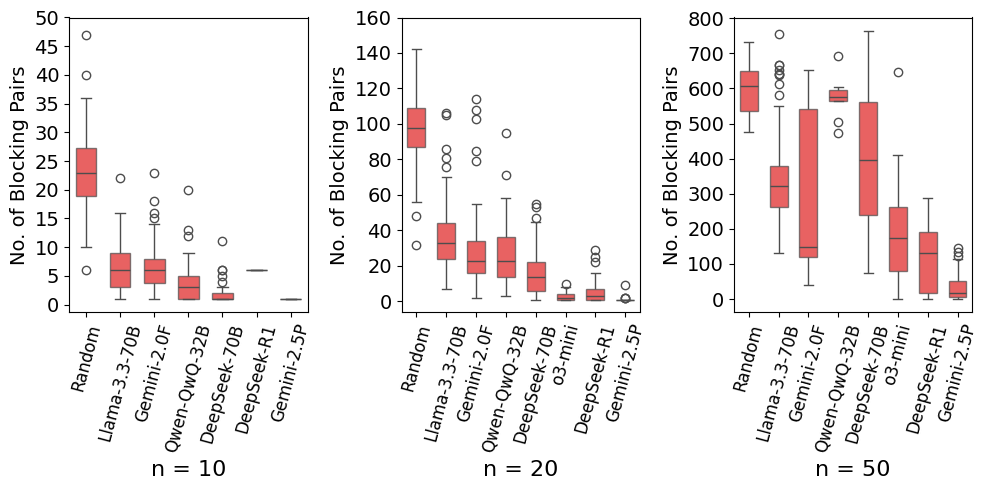

In [48]:
import seaborn as sns
p = 0
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
yticks = {
    10: [5*i for i in range(11)],
    20: [20*i for i in range(9)],
    50: [100*i for i in range(9)]
}
for size in [10, 20, 50]:
    # for culture in ['ic', 'womanmaster']:
    df = bp_dfs[size]
    maxval = max(df['BP_counts'].values)
    models = df['Model'].unique()
    ax = sns.boxplot(y="BP_counts", x="Model", data=df, orient='v', width=0.6, ax=axes[p], boxprops=dict(alpha=0.7), color='red')
    ax.set_ylabel("No. of Blocking Pairs", fontsize=14)
    ax.set_yticks(yticks[size])
    ax.set_yticklabels(yticks[size], fontsize = 14)
    ax.set_xlabel(f"n = {size}", fontsize=16)
    ax.set_xticklabels(models, rotation=75, fontsize=12)
    p += 1

fig.tight_layout()
fig.savefig(results_dir+"blocking_pairs_pt1.pdf", bbox_inches="tight")


In [53]:
# Welch’s t-test
from scipy import stats
import itertools
def get_k_subsets(input_list, k):
    """
    Generates all k-sized subsets from a list.
  
    Args:
        input_list: The list to generate subsets from.
        k: The size of the subsets.
  
    Returns:
        A list of lists, where each inner list is a k-sized subset of the input list.
    """
    return list(itertools.combinations(input_list, k))

pairs = get_k_subsets(['gemini', 'gemini25', 'llama', 'qwen', 'o3-mini', 'dsd', 'dsR1'], 2)
print(pairs)
bp_dfs = {}

gemini = pd.read_csv(results_dir+'gemini20_corrected.csv')
llama = pd.read_csv(results_dir+'llama33_corrected.csv')
qwen = pd.read_csv(results_dir+'qwen_qwq_corrected.csv')
gemini25 = pd.read_csv(results_dir+'gemini25_corrected.csv')
o3mini = pd.read_csv(results_dir+'o3-mini_corrected.csv')
dsd = pd.read_csv(results_dir+'deepseek_dist_corrected.csv')
deepseek = pd.read_csv(results_dir+'deepseek_corrected.csv')


for size in [10, 20, 50]:
    print(size)
    for culture in ['ic', 'womanmaster']:
        print(culture)

        bps = {
            'gemini': gemini[(gemini['Size'] == size) 
                            & (gemini['Culture'] == culture) 
                                & (gemini['Remarks'] == 'Processed smoothly.')
                                                        & (gemini['Correctness'] == 0)]
                                                        ['Intersection'].values,
            'llama': llama[(llama['Size'] == size) 
                        & (llama['Culture'] == culture) 
                            & (llama['Remarks'] == 'Processed smoothly.')
                                                        & (llama['Correctness'] == 0)]
                                                        ['Intersection'].values,
            'qwen': qwen[(qwen['Size'] == size) 
                        & (qwen['Culture'] == culture) 
                            & (qwen['Remarks'] == 'Processed smoothly.')
                                                        & (qwen['Correctness'] == 0)]
                                                        ['Intersection'].values,
            'gemini25': gemini25[(gemini25['Size'] == size) 
                                 & (gemini25['Culture'] == culture) 
                                    & (gemini25['Remarks'] == 'Processed smoothly.')
                                                        & (gemini25['Correctness'] == 0)]
                                                        ['Intersection'].values,
            'o3-mini': o3mini[(o3mini['Size'] == size) 
                                 & (o3mini['Culture'] == culture) 
                                    & (o3mini['Remarks'] == 'Processed smoothly.')
                                                        & (o3mini['Correctness'] == 0)]
                                                        ['Intersection'].values,
            'dsd': dsd[(dsd['Size'] == size) 
                                 & (dsd['Culture'] == culture) 
                                    & (dsd['Remarks'] == 'Processed smoothly.')
                                                        & (dsd['Correctness'] == 0)]
                                                        ['Intersection'].values,
            'dsR1': deepseek[(deepseek['Size'] == size) 
                                 & (deepseek['Culture'] == culture) 
                                    & (deepseek['Remarks'] == 'Processed smoothly.')
                                                        & (deepseek['Correctness'] == 0)]
                                                        ['Intersection'].values,

        }

        total_common = []

        matchings = pd.read_csv(f'../instances_matchings/{size}_ic_processed.csv')
        for i, row in enumerate(matchings.values[:50]):
            # if not i and culture == 'womanmaster' and size == 20:
            rand_matching = JSONMatchToList(row[12])
            men_optimal = JSONMatchToList(row[6])
            common = 0
            for p in range(len(men_optimal)):
                if men_optimal[p] == rand_matching[p]: common += 1
            total_common.append(common)

        matchings = pd.read_csv(f'../instances_matchings/{size}_womanmaster_processed.csv')
        for i, row in enumerate(matchings.values[:50]):
            # if not i and culture == 'womanmaster' and size == 20:
            rand_matching = JSONMatchToList(row[12])
            men_optimal = JSONMatchToList(row[6])
            common = 0
            for p in range(len(men_optimal)):
                if men_optimal[p] == rand_matching[p]: common += 1
            total_common.append(common)

        df = pd.DataFrame.from_dict(
            {
                'Model': ['Random']*100
                        + ['Llama-3.3-70B']*len(llama[(llama['Size'] == size) 
                    #  & (llama['Culture'] == culture) 
                        & (llama['Remarks'] == 'Processed smoothly.')
                        & (llama['Correctness'] == 0)]
                        ['Intersection'].values) 
                        + ['Gemini-2.0F']*len( gemini[(gemini['Size'] == size) 
                    #  & (gemini['Culture'] == culture) 
                        & (gemini['Remarks'] == 'Processed smoothly.')
                        & (gemini['Correctness'] == 0)]
                        ['Intersection'].values)
                        + ['Qwen-QwQ-32B']*len(qwen[(qwen['Size'] == size) 
                    #  & (qwen['Culture'] == culture) 
                        & (qwen['Remarks'] == 'Processed smoothly.')
                        & (qwen['Correctness'] == 0)]
                        ['Intersection'].values) 
                        + ['DeepSeek-70B']*len(dsd[(dsd['Size'] == size) 
                    #  & (gemini25['Culture'] == culture) 
                        & (dsd['Remarks'] == 'Processed smoothly.')
                        & (dsd['Correctness'] == 0)]
                        ['Intersection'].values)
                        + ['o3-mini']*len(o3mini[(o3mini['Size'] == size) 
                    #  & (gemini25['Culture'] == culture) 
                        & (o3mini['Remarks'] == 'Processed smoothly.')
                        & (o3mini['Correctness'] == 0)]
                        ['Intersection'].values)
                        + ['DeepSeek-R1']*len(deepseek[(deepseek['Size'] == size) 
                    #  & (gemini25['Culture'] == culture) 
                        & (deepseek['Remarks'] == 'Processed smoothly.')
                        & (deepseek['Correctness'] == 0)]
                        ['Intersection'].values)
                        + ['Gemini-2.5P']*len(gemini25[(gemini25['Size'] == size) 
                    #  & (gemini25['Culture'] == culture) 
                        & (gemini25['Remarks'] == 'Processed smoothly.')
                        & (gemini25['Correctness'] == 0)]
                        ['Intersection'].values),
                
                'BP_counts': 
                total_common
                + list(llama[(llama['Size'] == size) 
                            #  & (llama['Culture'] == culture) 
                            & (llama['Remarks'] == 'Processed smoothly.')
                                                        & (llama['Correctness'] == 0)]
                                                        ['Intersection'].values) 
                + list(gemini[(gemini['Size'] == size) 
                            # & (gemini['Culture'] == culture) 
                            & (gemini['Remarks'] == 'Processed smoothly.')
                                                        & (gemini['Correctness'] == 0)]
                                                        ['Intersection'].values) 
                + list(qwen[(qwen['Size'] == size) 
                            # & (qwen['Culture'] == culture) 
                            & (qwen['Remarks'] == 'Processed smoothly.')
                                                        & (qwen['Correctness'] == 0)]
                                                        ['Intersection'].values)  
                + list(dsd[(dsd['Size'] == size) 
                            # & (qwen['Culture'] == culture) 
                            & (dsd['Remarks'] == 'Processed smoothly.')
                                                        & (dsd['Correctness'] == 0)]
                                                        ['Intersection'].values) 
                + list(o3mini[(o3mini['Size'] == size) 
                            #  & (llama['Culture'] == culture) 
                            & (o3mini['Remarks'] == 'Processed smoothly.')
                                                        & (o3mini['Correctness'] == 0)]
                                                        ['Intersection'].values)
                + list(deepseek[(deepseek['Size'] == size) 
                                # & (gemini25['Culture'] == culture) 
                                & (deepseek['Remarks'] == 'Processed smoothly.')
                                                        & (deepseek['Correctness'] == 0)]
                                                        ['Intersection'].values)
                + list(gemini25[(gemini25['Size'] == size) 
                                # & (gemini25['Culture'] == culture) 
                                & (gemini25['Remarks'] == 'Processed smoothly.')
                                                        & (gemini25['Correctness'] == 0)]
                                                        ['Intersection'].values)
            }
        )
        # bp_dfs[f'{culture}-{size}'] = df
        bp_dfs[size] = df
        print(bps['gemini25'])

        for m1, m2 in pairs:
            test = stats.ttest_ind(bps[m1], bps[m2], equal_var=False)
            if test.pvalue < 0.1: 
                print(f'{m1}: {round(sum(bps[m1])/len(bps[m1]), 2)}')
                print(f'{m2}: {round(sum(bps[m2])/len(bps[m2]), 2)}')
                print(test)
                print()

[('gemini', 'gemini25'), ('gemini', 'llama'), ('gemini', 'qwen'), ('gemini', 'o3-mini'), ('gemini', 'dsd'), ('gemini', 'dsR1'), ('gemini25', 'llama'), ('gemini25', 'qwen'), ('gemini25', 'o3-mini'), ('gemini25', 'dsd'), ('gemini25', 'dsR1'), ('llama', 'qwen'), ('llama', 'o3-mini'), ('llama', 'dsd'), ('llama', 'dsR1'), ('qwen', 'o3-mini'), ('qwen', 'dsd'), ('qwen', 'dsR1'), ('o3-mini', 'dsd'), ('o3-mini', 'dsR1'), ('dsd', 'dsR1')]
10
ic
[7]
gemini: 3.74
llama: 4.52
TtestResult(statistic=-1.9116952526247606, pvalue=0.05893119865538323, df=94.93235703560413)

gemini: 3.74
qwen: 5.5
TtestResult(statistic=-4.175086158161003, pvalue=7.979677227091221e-05, df=74.634283815441)

gemini: 3.74
dsd: 5.6
TtestResult(statistic=-2.954944049748784, pvalue=0.0073556756612404685, df=21.84025839623826)

llama: 4.52
qwen: 5.5
TtestResult(statistic=-2.325668331872186, pvalue=0.02268974564214066, df=76.4502898441209)

llama: 4.52
dsd: 5.6
TtestResult(statistic=-1.7183475070590697, pvalue=0.09980944965381691,

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


[18 14 38 37  6  6 12 19  6 27 13 29 26 11 25 18 20  9 30 32 23 27 12 22
 20 29 14 26 15 26 14 31 27 31 23 17 19 29 32 25 22 34 41 10 29 32]
gemini: 11.07
gemini25: 22.3
TtestResult(statistic=-6.227349252890111, pvalue=1.5402011907834478e-07, df=44.16711926160244)

gemini: 11.07
llama: 6.91
TtestResult(statistic=2.9568643985969705, pvalue=0.00728280019817139, df=22.01613143120948)

gemini: 11.07
qwen: 1.0
TtestResult(statistic=6.384279798410596, pvalue=0.0011291245177801864, df=5.291270166750312)

gemini25: 22.3
llama: 6.91
TtestResult(statistic=10.252956613229768, pvalue=2.4780410705458694e-15, df=66.5865963740182)

gemini25: 22.3
qwen: 1.0
TtestResult(statistic=12.811898837973441, pvalue=3.427949128511067e-06, df=7.150658773901648)

gemini25: 22.3
o3-mini: 10.52
TtestResult(statistic=7.99338388679437, pvalue=2.988806013273542e-11, df=65.0336383408664)

gemini25: 22.3
dsd: 8.67
TtestResult(statistic=4.339558428346426, pvalue=0.023227051839096298, df=2.9589400315544103)

gemini25: 22.3

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_9435/103382127.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=75, fontsize=12)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_9435/103382127.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=75, fontsize=

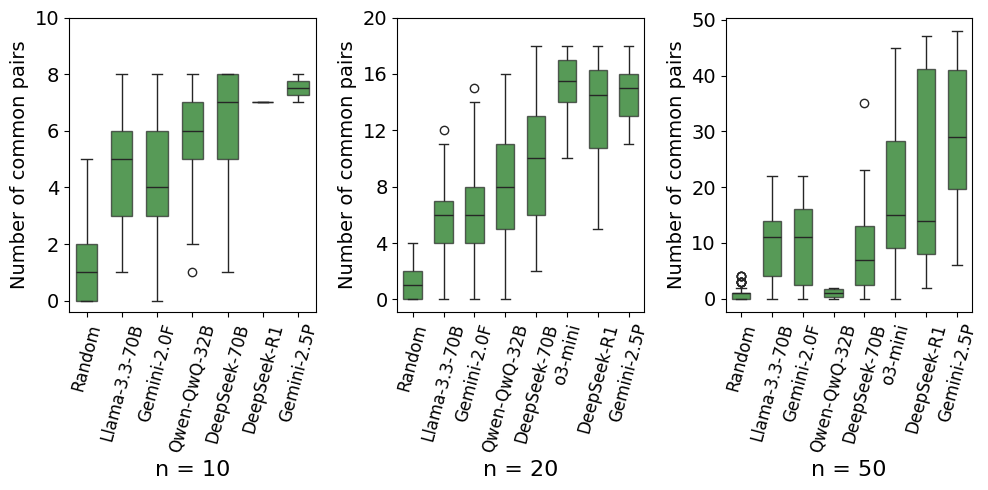

In [54]:
import seaborn as sns
p = 0
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
yticks = {
    10: [i*2 for i in range(6)],
    20: [i*4 for i in range(6)],
    50: [i*10 for i in range(6)]
}
for size in [10, 20, 50]:
    # for culture in ['ic', 'womanmaster']:
    df = bp_dfs[size]
    maxval = max(df['BP_counts'].values)
    models = df['Model'].unique()
    ax = sns.boxplot(y="BP_counts", x="Model", data=df, orient='v', width=0.6, ax=axes[p], color='green', boxprops=dict(alpha=0.7))
    ax.set_ylabel("Number of common pairs", fontsize=14)
    ax.set_yticks(yticks[size])
    ax.set_yticklabels(yticks[size], fontsize = 14)
    ax.set_xlabel(f"n = {size}", fontsize=16)
    ax.set_xticklabels(models, rotation=75, fontsize=12)
    p += 1

fig.tight_layout()
fig.savefig(results_dir+"intersection_pt1.pdf", bbox_inches="tight")

### New

In [4]:
import csv
from BlockingPairs import blockingPairs
import json

combined = [['Model', 'Culture', 'Size', 'Instability', 'Optimality']]
file_names = {
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

def JSONMatchToList(json_match_string):
    json_match_string = json_match_string.replace(" ", "")
    if json_match_string.endswith("],]"):
        pairs = json_match_string[1:-2].split('],[')
    else:
        pairs = json_match_string[1:-1].split('],[')
    
    # print("IN JSON TO STR FUNC")
    # print(pairs)

    # Step 2: Extract the W number from each pair and convert to integer
    result = []
    for pair in pairs:
        # Split the pair and take the second element (Wj), then extract the number
        w_value_str = (pair.split(',')[1][1:])
        if w_value_str[-1] == "]":
            if w_value_str[-2] == "]":
                w_value = int(w_value_str[:-2])
            else:
                w_value = int(w_value_str[:-1])
        else:
            w_value = int(w_value_str)
        result.append(w_value)

    # Step 3: Print the resulting list
    return result
    # print(result)  # Output: [7, 2, 9, 5, 4, 1, 6, 8, 10, 3]

def JSONobjToList(json_obj, n):
    if not json_obj:
        print("EMPTY JSON OBJ")
        return [], 'empty'
    matching = []
    for m in range(1, n+1):
        mstring = f"M{m}"
        if mstring not in json_obj or not json_obj[mstring] or json_obj[mstring].lower().strip() == 'none':
            matching.append(0)
        else:
            try:
                woman = int(json_obj[mstring][1:])
                matching.append(woman)
            except:
                print(f"WRONG VALUE FORMAT: {json_obj[mstring]}")
                return matching, f"For example, {mstring}'s match is given the incorrect format - {json_obj[mstring]}. "
    return matching, "okay"

def jaccard_similarity(list1, list2):
    set1 = set()
    set2 = set()
    for m, w in enumerate(list1):
        set1.add((m+1, w))
    for m, w in enumerate(list2):
        set2.add((m+1, w))

    jaccard_sim = len(set1.intersection(set2))/len(set1.union(set2))

    return jaccard_sim, len(set1.intersection(set2))


for culture in ['ic', 'womanmaster']:
    for size in [10,20,50]:
        instances_data = pd.read_csv(f'../instances_matchings/{size}_{culture}_processed.csv')
        for row in instances_data.values:
            rand_match = JSONMatchToList(row[12])
            men_opt = JSONMatchToList(row[6])
            bp = blockingPairs(size, row[4], row[5], np.array(rand_match), "weak")
            bplist = bp['blockingPairs']
            male_set, female_set = set(), set()
            for man, woman in bplist:
                female_set.add(woman)
                male_set.add(man)
            instability = round((len(female_set)+len(male_set))*100/(size*2), 2)
            # print(instability)
            # print(blocked, len(male_set), len(female_set), i)
            js, inter = jaccard_similarity(rand_match, men_opt)
            combined.append(['Random', culture, size, instability, round(js, 2)])
        for model in file_names:
            model_data = pd.read_csv(results_dir+file_names[model])
            subset = model_data[(model_data['Culture'] == culture) & (model_data['Size'] == size)]
            for i, row in enumerate(subset.values):
                if row[-1] != 'Processed smoothly.': continue
                answer, verdict = JSONobjToList(json.loads(row[3].replace('\'', '\"')), size)
                men_opt = JSONMatchToList(instances_data['men_opt'].values[i])
                js, inter = jaccard_similarity(answer, men_opt)
                male_set, female_set = set(), set()
                blocked = row[6].replace('[', '').replace(']', '').split(', ')
                # print(row[6])
                if row[4] == 1: 
                    combined.append([model, culture, size, 0, 1])
                    continue
                for i, agent in enumerate(blocked):
                    if i%2:
                        female_set.add(agent)
                    else:
                        male_set.add(agent)
                instability = round((len(female_set)+len(male_set))*100/(size*2), 2)
                # print(instability)
                # print(blocked, len(male_set), len(female_set), i)
                combined.append([model, culture, size, instability, round(row[-3], 2)])
                # print(model, culture, size, row[-2], inter)

with open(results_dir+'combined_instability_intersection.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(combined)




/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_8806/2047658502.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order, rotation=75, fontsize=12)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_8806/2047658502.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order, rotation=75, fontsize=

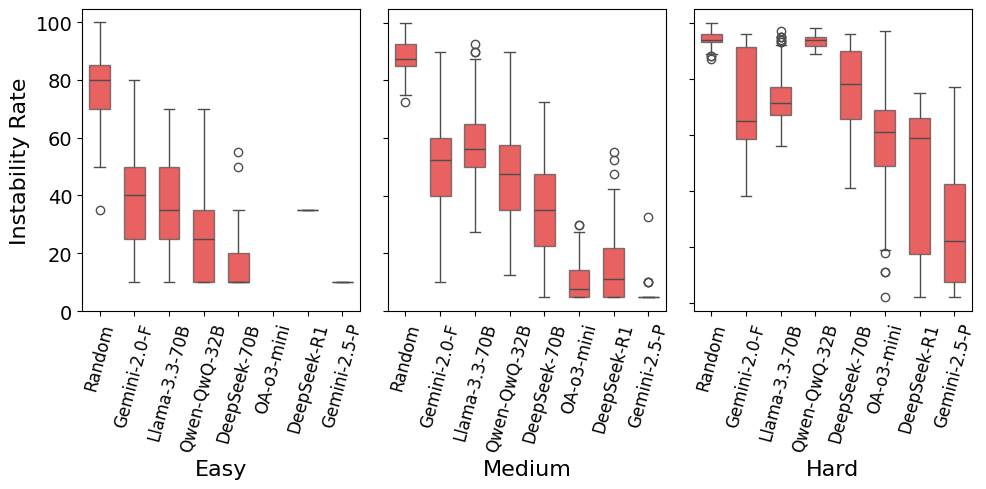

In [5]:
import seaborn as sns
p = 0
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
yticks = {
    10: [20*i for i in range(6)],
    20: [20*i for i in range(6)],
    50: [20*i for i in range(6)]
}
names = {
    10: "Easy",
    20: "Medium",
    50: "Hard",
}
file_names = {
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

order  = ['Random'] + list(file_names.keys())
total_df = pd. read_csv(results_dir+'combined_instability_intersection.csv')
for size in [10, 20, 50]:
    # for culture in ['ic', 'womanmaster']:
    df = total_df[(total_df['Size'] == size) & (total_df['Instability'] > 0)]
    maxval = max(df['Instability'].values)
    models = df['Model'].unique()
    ax = sns.boxplot(y="Instability", x="Model", data=df, orient='v', width=0.6, ax=axes[p], boxprops=dict(alpha=0.7), color='red', order=order)
    ax.set_ylabel("Instability Rate" if size < 20 else '', fontsize=16)
    ax.set_yticks(yticks[size])
    ax.set_yticklabels(yticks[size] if size < 20 else ['']*6, fontsize = 14)
    ax.set_xlabel(f"{names[size]}", fontsize=16)
    ax.set_xticklabels(order, rotation=75, fontsize=12)
    p += 1

fig.tight_layout()
fig.savefig(results_dir+"blocking_pairs_pt1.pdf", bbox_inches="tight")


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_82297/3552102227.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order, rotation=75, fontsize=12)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_82297/3552102227.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order, rotation=75, fontsiz

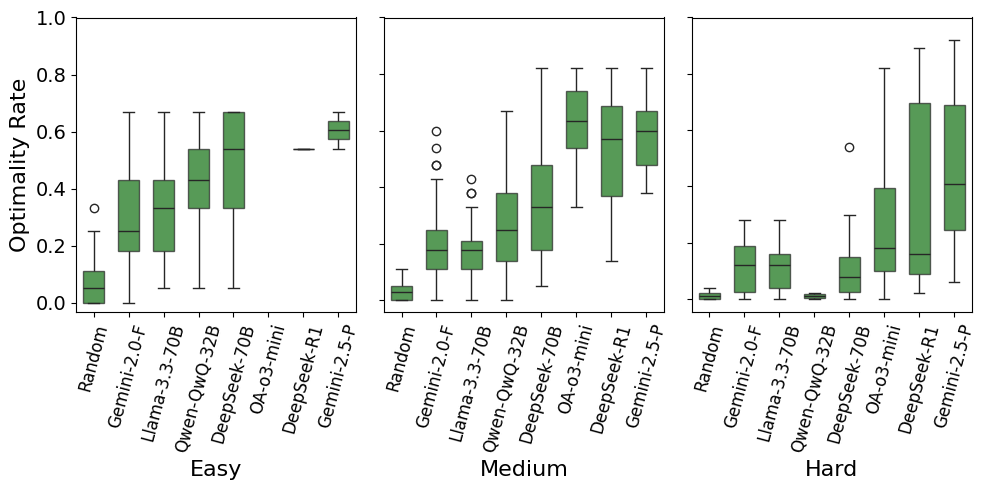

In [19]:
import seaborn as sns
p = 0
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
yticks = {
    10: [round(0.2*i,1) for i in range(6)],
    20: [round(0.2*i,1) for i in range(6)],
    50: [round(0.2*i,1) for i in range(6)]
}
names = {
    10: "Easy",
    20: "Medium",
    50: "Hard",
}

order  = ['Random'] + list(file_names.keys())
total_df = pd. read_csv(results_dir+'combined_instability_intersection.csv')
for size in [10, 20, 50]:
    # for culture in ['ic', 'womanmaster']:
    df = total_df[(total_df['Size'] == size) & (total_df['Instability'] > 0)]
    maxval = max(df['Optimality'].values)
    models = df['Model'].unique()
    ax = sns.boxplot(y="Optimality", x="Model", data=df, orient='v', width=0.6, ax=axes[p], boxprops=dict(alpha=0.7), color='green', order=order)
    ax.set_ylabel("Optimality Rate" if size < 20 else '', fontsize=16)
    ax.set_yticks(yticks[size])
    ax.set_yticklabels(yticks[size] if size < 20 else ['']*6, fontsize = 14)
    ax.set_xlabel(f"{names[size]}", fontsize=16)
    ax.set_xticklabels(order, rotation=75, fontsize=12)
    p += 1

fig.tight_layout()
fig.savefig(results_dir+"intersection_pt1.pdf", bbox_inches="tight")


new_order = {'Stable (Correct)': array([ 1,  4, 10, 36, 50, 49, 49]), 'Unstable': array([49, 45, 39, 14,  0,  1,  1]), 'Partial': array([0, 0, 0, 0, 0, 0, 0]), 'Invalid': array([0, 0, 0, 0, 0, 0, 0]), 'Fail': array([0, 1, 1, 0, 0, 0, 0])}
index=['Llama-3.3-70B', 'Gemini-2.0-F', 'Qwen-QwQ-32B', 'DeepSeek-70B', 'OA-o3-mini', 'DeepSeek-R1', 'Gemini-2.5-P']
new_order = {'Stable (Correct)': array([ 0,  3, 14, 35, 50, 50, 49]), 'Unstable': array([50, 47, 34, 15,  0,  0,  1]), 'Partial': array([0, 0, 1, 0, 0, 0, 0]), 'Invalid': array([0, 0, 0, 0, 0, 0, 0]), 'Fail': array([0, 0, 1, 0, 0, 0, 0])}
index=['Llama-3.3-70B', 'Gemini-2.0-F', 'Qwen-QwQ-32B', 'DeepSeek-70B', 'OA-o3-mini', 'DeepSeek-R1', 'Gemini-2.5-P']
new_order = {'Stable (Correct)': array([ 0,  0,  0,  7, 40, 43, 44]), 'Unstable': array([50, 48, 31, 43, 10,  7,  6]), 'Partial': array([0, 1, 0, 0, 0, 0, 0]), 'Invalid': array([0, 1, 7, 0, 0, 0, 0]), 'Fail': array([ 0,  0, 12,  0,  0,  0,  0])}
index=['Llama-3.3-70B', 'Gemini-2.0-F', 'Q

/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_72848/1070073429.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_72848/1070073429.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_72848/1070073429.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_72848/1070073429.py:90: UserWarning: set_ticklabels() should only be used with a fixed numbe

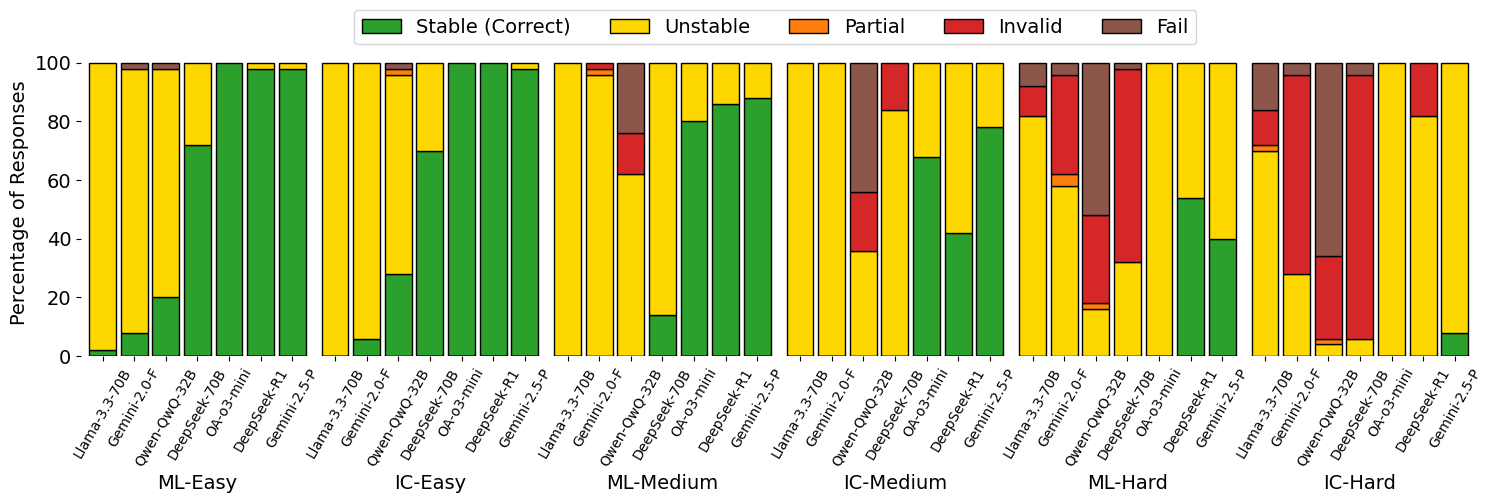

In [14]:
file_names = {
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

sizes = [10, 20, 50]
cultures = {
    'womanmaster': 'ML',
    'ic': 'IC', 
}
size_names = {
     10: "Easy",
     20: "Medium",
     50: "Hard"
}

no = []
treatments = []
index = [model for model in file_names]

for size in sizes:
    for culture in cultures:
        treatments.append(f'{cultures[culture]}-{size_names[size]}')
        invalids, stables, unstables, incompletes, emptys = [], [], [], [], []
        for model in file_names:
            data = pd.read_csv(results_dir+file_names[model])
            invalids.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'INVALID MATCHING!')]))
            incompletes.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'INCOMPLETE MATCHING!')]))
            emptys.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'EMPTY/NO MATCHING!')]))
            stables.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Blocking_Pair_Count'] == 0) & (data['Remarks'] == 'Processed smoothly.')]))
            unstables.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Blocking_Pair_Count'] != 0) & (data['Remarks'] == 'Processed smoothly.')]))
        weight_counts = {
            "Stable (Correct)": np.array(stables),
            "Unstable": np.array(unstables),
            "Partial": np.array(incompletes),
            "Invalid": np.array(invalids),
            "Fail": np.array(emptys),
        }
        no.append(weight_counts)

def plot_stacked_graph(
            # self, 
            questions=[1,2,3,4,5,6], 
            title = 'Achieving_Stability', 
            figsize=(18,4), 
            labels_fontsize=14,
            ticks_fontsize=14,
            legend_fontsize=14,
            legend_pos=(0.75, 1.0),
        ):
        f, axs = plt.subplots(nrows=1, ncols=len(questions), sharey=True, figsize=figsize)
        plt.subplots_adjust(wspace=0)
        plt.tick_params(left = False)

        for j, question in enumerate(questions):
            # self.get_comparison(question, option, humans=humans)
            # ques_index = [self.index[ind] for ind in question_ordering[question]]
            ques_index = index
            new_order = {}
            # for key in self.metrics[f'q{question}']['order']:
                # new_order[key] = [self.metrics[f'q{question}']['order'][key][ind] for ind in question_ordering[question]]
            new_order = no[j]
            print(f"new_order = {new_order}\nindex={ques_index}")
            df = pd.DataFrame(data=new_order, index=ques_index)
            ax = df.plot(
                kind="bar", 
                ax=axs[j], 
                stacked=True, 
                rot=60, 
                width=0.85, 
                legend=False, 
                # color=['limegreen', 'palegreen', 'yellow', 'gold', 'orange', 'orangered'],
                color = ["tab:green", "gold", "tab:orange", "tab:red", "tab:brown"],
                edgecolor='black'
            ) 

            bars = ax.patches
            hatches = ''.join(h*len(df) for h in '\./')

            # for bar, hatch in zip(bars, hatches):
            #     bar.set_hatch(hatch)

            ax.set_xlabel(fr'{treatments[j]}', fontsize=labels_fontsize)
            ax.set_ylabel('Percentage of Responses', fontsize=labels_fontsize)
            ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)

            if j != 0:
                ax.spines['left'].set_visible(False)
                ax.tick_params(left=False)

            ax.spines['left'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)

            handles, labels = ax.get_legend_handles_labels()
                

        f.legend(handles, labels, bbox_to_anchor=legend_pos, fontsize=legend_fontsize, ncol = 5)

        f.savefig(results_dir+f"{title}.pdf", bbox_inches="tight")

plot_stacked_graph()